In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [78]:
ff = pd.read_csv("../results/2022_07_flares_vetted.csv")
ff_to_fill = pd.read_csv("../results/2022_07_flares.csv")
ff.shape, ff_to_fill.shape

((10296, 22), (10764, 22))

In [84]:
g = lambda x: f"{x.ID}_{x.mission}_{x.qcs}_{x.lc_n}"
ff["helpid"] = ff.apply(g, axis=1)
ff_to_fill["helpid"] = ff_to_fill.apply(g, axis=1)

In [85]:
ids_searched = set(list(ff_to_fill.groupby('helpid').indices.keys()))
ids_vetted = set(list(ff.groupby('helpid').indices.keys()))
ids_to_add = list(ids_searched-ids_vetted)

In [87]:
ids_to_add

['Kepler-297_Kepler_13_6',
 'Kepler-57_Kepler_17_5',
 'Kepler-211_TESS_100_6',
 'Kepler-211_Kepler_8_1',
 'Kepler-57_Kepler_13_6',
 'Kepler-57_Kepler_10_8',
 'Kepler-297_Kepler_12_7',
 'Kepler-297_Kepler_14_5',
 'Kepler-297_TESS_14_8',
 'Kepler-211_TESS_53_6',
 'Kepler-125_TESS_41_9',
 'Kepler-125_Kepler_10_6',
 'Kepler-211_TESS_41_5',
 'Kepler-211_TESS_40_4',
 'Kepler-57_Kepler_11_7',
 'Kepler-297_TESS_15_9',
 'Kepler-125_Kepler_12_5']

In [88]:
ff_to_add = ff_to_fill[ff_to_fill.helpid.isin(ids_to_add)]
ff_to_add

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,...,TIC,qcs,mission,tstamp,lc_n,w,mask_pos_outliers_sigma,real,note,helpid
5726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,17,Kepler,2022_08_01,5,123,2.5,-1.0,NaN,Kepler-57_Kepler_17_5
5727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,17,Kepler,2022_08_01,5,123,2.5,-1.0,NaN,Kepler-57_Kepler_17_5
5728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,13,Kepler,2022_08_01,6,123,2.5,-1.0,NaN,Kepler-57_Kepler_13_6
5729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,13,Kepler,2022_08_01,6,123,2.5,-1.0,NaN,Kepler-57_Kepler_13_6
5730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,13,Kepler,2022_08_01,6,123,2.5,-1.0,NaN,Kepler-57_Kepler_13_6
5731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,11,Kepler,2022_08_01,7,123,2.5,-1.0,NaN,Kepler-57_Kepler_11_7
5732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,11,Kepler,2022_08_01,7,123,2.5,-1.0,NaN,Kepler-57_Kepler_11_7
5733,21994.0,21997.0,1416425.0,1416428.0,1081.537074,1081.539117,1.614778,0.127417,0.011994,0.002043,...,270615136,11,Kepler,2022_08_01,7,123,2.5,NaN,NaN,Kepler-57_Kepler_11_7
5734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,10,Kepler,2022_08_01,8,123,2.5,-1.0,NaN,Kepler-57_Kepler_10_8
5735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,10,Kepler,2022_08_01,8,123,2.5,-1.0,NaN,Kepler-57_Kepler_10_8


In [89]:
ff_new = ff.append(ff_to_add)
ff_new.iloc[ff.shape[0]-5:ff.shape[0]+5]

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,...,TIC,qcs,mission,tstamp,lc_n,w,mask_pos_outliers_sigma,real,note,helpid
10291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159444082,16,Kepler,2022_08_05,1,123,2.5,-1.0,NaN,Kepler-161_Kepler_16_1
10292,7606.0,7620.0,1997485.0,1997499.0,1477.307632,1477.317167,4.367549,0.300577,0.007246,0.009535,...,159444082,17,Kepler,2022_08_05,4,123,2.5,0.0,NaN,Kepler-161_Kepler_17_4
10293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159444082,17,Kepler,2022_08_05,4,123,2.5,-1.0,NaN,Kepler-161_Kepler_17_4
10294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159444082,17,Kepler,2022_08_05,4,123,2.5,-1.0,NaN,Kepler-161_Kepler_17_4
10295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159444082,17,Kepler,2022_08_05,4,123,2.5,-1.0,NaN,Kepler-161_Kepler_17_4
5726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,17,Kepler,2022_08_01,5,123,2.5,-1.0,NaN,Kepler-57_Kepler_17_5
5727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,17,Kepler,2022_08_01,5,123,2.5,-1.0,NaN,Kepler-57_Kepler_17_5
5728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,13,Kepler,2022_08_01,6,123,2.5,-1.0,NaN,Kepler-57_Kepler_13_6
5729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,13,Kepler,2022_08_01,6,123,2.5,-1.0,NaN,Kepler-57_Kepler_13_6
5730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270615136,13,Kepler,2022_08_01,6,123,2.5,-1.0,NaN,Kepler-57_Kepler_13_6


In [90]:
ff_new.shape

(10333, 23)

In [91]:
ff_new.to_csv("../results/2022_07_flares_vetted.csv",index=False)

# Vetting flares

Left to vet: 2
(352007758, 8, 'Kepler', '2022_08_05') Kepler-211
            tstart        tstop          ID        TIC  qcs  real
10327  1578.100561  1578.102605  Kepler-211  352007758    8   NaN
10328  1590.998090  1591.011713  Kepler-211  352007758    8   NaN


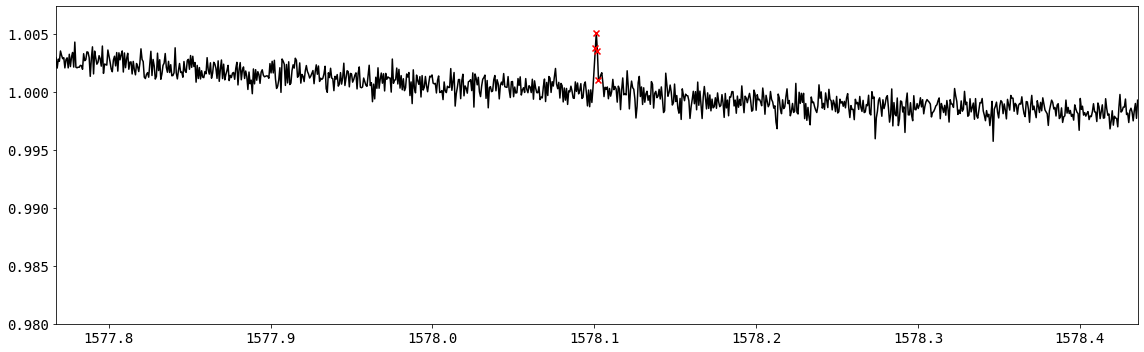

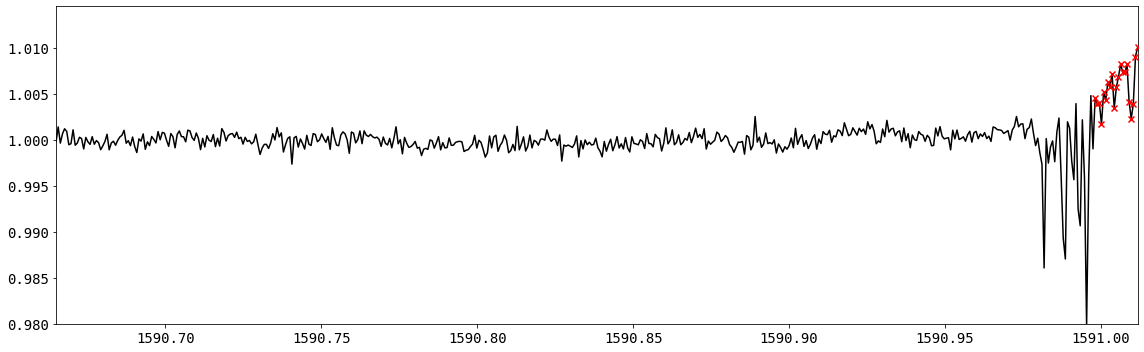

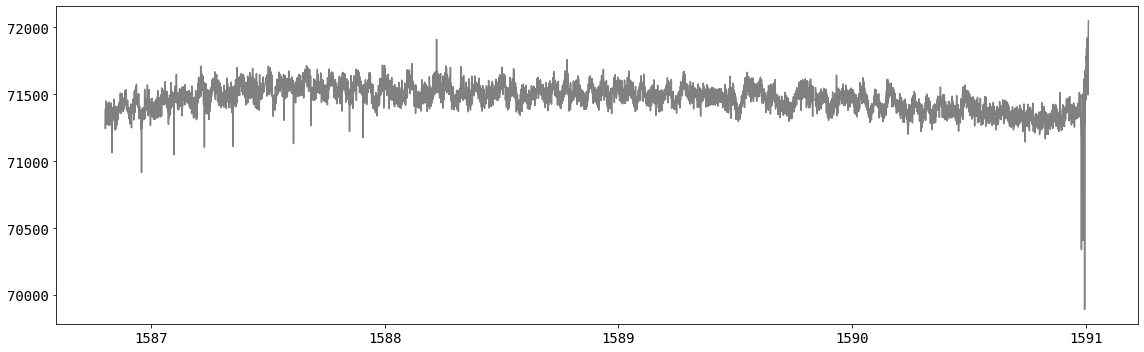

In [113]:
# --------------------------------------
# select flares to vet
f = pd.read_csv("../results/2022_07_flares_vetted.csv")
# ff = ff[(ff.ID == string.split("_")[0]) & (ff.qcs==int(string.split("_")[1]))]
columns = ["TIC","qcs","mission","tstamp"]
name = list(f[f.real.isnull()].groupby(columns).indices)[0]
ff = f[f.real.isnull()].groupby(columns).get_group(name)
ID = ff.ID.iloc[0]
TIC, qcs, mission,tstamp = name
shape = f.shape[0]
print(f"Left to vet: {f[f.real.isnull()].shape[0]}")
print(name, ID)
print(ff[['tstart',"tstop","ID","TIC","qcs","real"]])

# ---------------------------------------
# view flares
%matplotlib inline
for j, flare in ff.iloc[:].iterrows():
    ts, tf = flare.tstart, flare.tstop
    t0, t1, i = 1e5, 0., 0
    
    while (ts<t0) | (ts>t1):
        try:
            string = f"{ID}_{qcs:02}_altai_{i}"
            fff = fits.open(f"/media/ekaterina/182C-BC05/lcs_w_phases/{tstamp}_{string}.fits")[1].data
        except FileNotFoundError:
            string = f"{TIC}_{qcs:02}_altai_0"
            fff = fits.open(f"/media/ekaterina/182C-BC05/lcs_w_phases/{tstamp}_{string}.fits")[1].data
        t0,t1 = fff["time"][0],fff["time"][-1]
#         print(t0,ts,t1)
        i+=1
    plt.figure(figsize=(16,5))
    cap=.3
    
#     print(ts,tf)
    _ = fff[np.where((fff['time']>=ts-.1/cap) & (fff['time']<=tf+.1/cap))]
    med = np.median(_['flux'])
    plt.plot(_['time'], _['flux']/med, c="k")
    plt.xlim(_["time"][0],_["time"][-1])
    _ = fff[np.where((fff['time']>=ts-1e-8) & (fff['time']<=tf+1e-8))]
    plt.scatter(_['time'], _['flux']/med, c="r",zorder=10)

    plt.scatter(ts, flare.phase/5 + 1)
    plt.plot(_['time'], _['phase']/5 + 1, c="grey")
    plt.ylim(.98,flare.ampl_rec*1.5 +1)
    
plt.figure(figsize=(16,5))
plt.plot(fff["time"],fff["flux"],c="grey")
# plt.xlim(1590,1595)

In [114]:
f.loc[ff.index,columns+["real"]]

,TIC,qcs,mission,tstamp,real
10327,352007758,8,Kepler,2022_08_05,NaN
10328,352007758,8,Kepler,2022_08_05,NaN


In [115]:
f.loc[ff.index,"real"] = 0

In [116]:
assert f.shape[0] == shape
f.to_csv("../results/2022_07_flares_vetted.csv",index=False)